<b>Imports</b>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import itertools
import matplotlib.pyplot as plt

<b>Path to resources</b>

In [2]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

<b>ImageDataGenerator.flow_from_directory(directory, target_size, classes, batch_size)</b>
<ul>
    <li>directory:    path to directory. All PNG, JPG, BMP, PPM, TIF files in each subdirectory will be included in the generator.</li>
    <li>target_size:  (height, width) that the images will be resized to.</li>
    <li>classes:      Will import from subdirectories in classes.</li>
    <li>batch_size:   Size of batches of data.</li>
</ul>

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(720,1280), classes=['potato', 'catfood'], batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(720,1280), classes=['potato', 'catfood'], batch_size = 4)
test_batches  = ImageDataGenerator().flow_from_directory(test_path, target_size=(720,1280), classes=['potato', 'catfood'], batch_size = 4)

Found 431 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
# Used to plot images with labels.
def plots(ims, figsize=(20,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

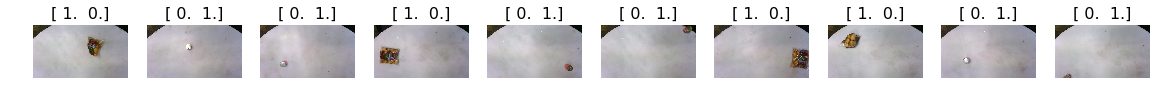

In [6]:
plots(imgs, titles=labels)